In [133]:
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

In [134]:
#Get relative path of the CSV File 
#Enumerate therough all the files in the folder and check if the path exists

mypath = os.path.dirname(os.path.realpath('train.csv'))
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
os.path.exists(mypath)

True

In [135]:
print(onlyfiles[4])

train.csv


In [141]:
#Read Training CSV for house regression
dataset = pd.read_csv(onlyfiles[4])
dataset.shape
dataset.drop(['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [143]:
testDataset = pd.read_csv(onlyfiles[3])
testDataset.head()
testDataset.drop(['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


importing the dataset 
encode categorical data
Backward elimination

In [144]:
#Delete redundant features with over 50% NAN values E.G: porch sizes, pool area, alley, miscallenous features and its value 
unwantedFeaturesList = ["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
                       "PoolQC","Fence","Alley","MiscFeature","MiscVal"]
dataset.drop(unwantedFeaturesList,inplace=True,axis=1)
testDataset.drop(unwantedFeaturesList,inplace=True,axis=1)

In [145]:
# Check all the columns fetures whcih has a numerical value type
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
is_number(dataset.dtypes)

array([ True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False,  True,  True, False, False,  True], dtype=bool)

In [37]:
#Separate and select dataframes by dataTypes 
df_NonNumericalType = dataset.select_dtypes(exclude=[np.number])
df_NumericalType = dataset.select_dtypes(include=[np.number])

#prepare test dataset
df_TestNonNumericalType = testDataset.select_dtypes(exclude=[np.number])
df_TestNumericalType = testDataset.select_dtypes(include=[np.number])

#Set type to categorical
df_NonNumericalType[df_NonNumericalType.select_dtypes(['object']).columns] = df_NonNumericalType.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df_TestNonNumericalType[df_TestNonNumericalType.select_dtypes(['object']).columns] = df_TestNonNumericalType.select_dtypes(['object']).apply(lambda x: x.astype('category'))


/Users/MM/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


MSZoning         category
Street           category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinType2     category
Heating          category
HeatingQC        category
CentralAir       category
Electrical       category
KitchenQual      category
Functional       category
FireplaceQu      category
GarageType       category
GarageFinish     category
GarageQual       category
GarageCond       category
PavedDrive       category
SaleType         category
SaleConditio

In [178]:
#df_NumericalType.drop(["Id"], inplace=True, axis=1)
#replace all the NA values to numpy NAN for float 64 data type
df_NumericalType.replace('NA',np.nan)
df_TestNumericalType.replace('NA',np.nan)
#Select Numerical values except the index 
xNumerical = df_NumericalType.values
xTestNumerical = df_TestNumericalType.values

In [179]:
#Handle missing data for numerical values 
from sklearn.preprocessing import Imputer
if df_TestNumericalType.isnull().values.any() :
    #mean is the deafualt parameter anywyas
    imputer = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
    imputer.fit(xTestNumerical[:,2:32])
    xTestNumerical[:,2:32] = imputer.transform(xTestNumerical[:,2:32])

In [193]:
#Handle missing data for numerical values 
from sklearn.preprocessing import Imputer
if df_NumericalType.isnull().values.any() :
    #mean is the deafualt parameter anywyas
    imputer = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
    imputer.fit(xNumerical[:,1:30])
    xNumerical[:,1:30] = imputer.transform(xNumerical[:,1:30])

In [194]:
np.isnan(xNumerical).any()

False

In [195]:
#Scaling Numerical data
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
NumericalScaledData = sc_X.fit_transform(xNumerical)
TestNumericalScaledData = sc_X.fit_transform(xTestNumerical)

In [196]:
df_AllNonNumerical = pd.concat([df_NonNumericalType, df_TestNonNumericalType], axis=0)
df_AllNonNumerical[df_AllNonNumerical.select_dtypes(['object']).columns] = df_AllNonNumerical.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_features = [key for key in dict(df_AllNonNumerical.dtypes) if dict(df_AllNonNumerical.dtypes)[key] in ['category']]
df_AllNonNumericalEncoded = pd.get_dummies(df_AllNonNumerical, columns=cat_features, drop_first=True)
df_NonNumericalencoded = df_AllNonNumericalEncoded[:len(df_NonNumericalType.values)]

#Encode Test numerical data
df_TestNonNumericalencoded = df_AllNonNumericalEncoded[len(df_NonNumericalType.values):]


In [197]:
#Sort by categorical data and encoding it
#Create dummy data for all the categorical columns
cat_features = [key for key in dict(df_NonNumericalType.dtypes) if dict(df_NonNumericalType.dtypes)[key] in ['category']]
df_NonNumericalencoded = pd.get_dummies(df_NonNumericalType, columns=cat_features, drop_first=True)
cat_features = [key for key in dict(df_TestNonNumericalType.dtypes) if dict(df_TestNonNumericalType.dtypes)[key] in ['category']]
df_TestNonNumericalencoded = pd.get_dummies(df_TestNonNumericalType, columns=cat_features, drop_first=True)
#df_NonNumericalencoded.reset_index(level=0, inplace=True)
#df_NumericalType.reset_index(level=0, inplace=True)

In [199]:
df_NumericalScaled = pd.DataFrame(NumericalScaledData)
df_NumericalScaled.columns = df_NumericalType.columns
df_AllTypes = pd.concat([df_NumericalScaled, df_NonNumericalencoded], axis=1)

-Prepare test data for future testing purpose.
-16 features less due to categorical dummy varaibles introduction in previous steps

In [200]:
df_TestNumericalScaled = pd.DataFrame(TestNumericalScaledData)
df_TestNumericalScaled.columns = df_TestNumericalType.columns
df_AllTestTypes = pd.concat([df_TestNumericalScaled, df_TestNonNumericalencoded], axis=1)
df_AllTestTypes.shape

(1459, 214)

In [201]:
# instantiate the independent variable
from sklearn.tree import *
Y = dataset.iloc[:,-1]

In [202]:
#Split training dataset into test and train dataset
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_AllTypes.values,Y.values, test_size = 0.2)

In [222]:
#Using Decesion tree regressor to score the split test data
reg = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3,random_state = 0)
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.65848048191483266

In [215]:
#Using Random forest regressor to score
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(n_estimators = 100, random_state = 0,oob_score=True)
reg2.fit(X_train,Y_train)
reg2.score(X_test,Y_test),reg2.oob_score_

(0.78871360358328191, 0.86027209851320419)

In [217]:
y_1 = reg.predict(X_test)
Y_2 = reg.predict(X_test)

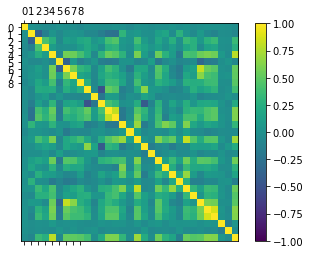

In [228]:
names = dataset.columns
#data = pandas.read_csv(url, names=names)
correlations = dataset.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()